In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

measure_df= pd.read_sql('SELECT * from measurement',conn)
measure_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [6]:

# reflect the tables
station_df = pd.read_sql('SELECT * FROM station', conn)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Climate Analysis

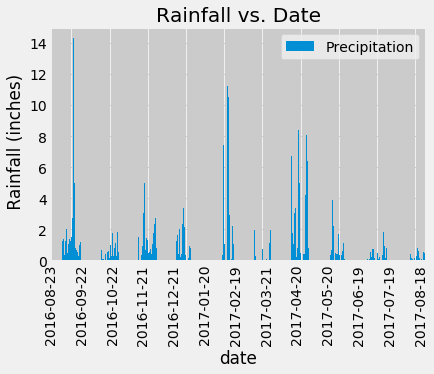

In [7]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_year= pd.read_sql("SELECT * FROM measurement where date between '2016-08-23' and '2017-08-23'", conn)
precip_year

# Perform a query to retrieve the data and precipitation scores
precip_plot= precip_year[['date','prcp']]
date_plot= precip_plot.set_index(['date'])

df=date_plot.sort_values('date')

df_group = df.groupby(['date']).sum()


ax = df_group.plot(kind = 'bar')
plt.title('Rainfall vs. Date')
plt.ylabel(' Rainfall (inches)')
every_nth = 30
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

L=plt.legend()
L.get_texts()[0].set_text('Precipitation')        
        
plt.show()

In [8]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation= measure_df["prcp"].describe()
precipitation

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [9]:
# Design a query to show how many stations are available in this dataset?
station_df["station"].count()

9

In [10]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station=measure_df["station"].value_counts()
active_station

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [11]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active= measure_df.loc[measure_df['station']== 'USC00519281' ]
active

active_sql= pd.read_sql("SELECT * FROM measurement where station = 'USC00519281'", conn)
active_sql

,id,station,date,prcp,tobs
0,12188,USC00519281,2010-01-01,0.15,70.0
1,12189,USC00519281,2010-01-02,0.00,62.0
2,12190,USC00519281,2010-01-03,0.00,74.0
3,12191,USC00519281,2010-01-04,0.00,75.0
4,12192,USC00519281,2010-01-05,0.00,74.0
...,...,...,...,...,...
2767,14955,USC00519281,2017-08-14,0.00,77.0
2768,14956,USC00519281,2017-08-15,0.32,77.0
2769,14957,USC00519281,2017-08-16,0.12,76.0
2770,14958,USC00519281,2017-08-17,0.01,76.0


In [12]:
# highest temperature recorded
temp_high= pd.read_sql("SELECT MAX(tobs) as 'Max Temp' FROM measurement where station = 'USC00519281'", conn)
temp_high

,Max Temp
0,85.0


In [13]:
# lowest temperature
temp_low= pd.read_sql("SELECT MIN(tobs) as 'Min Temp' FROM measurement where station = 'USC00519281'", conn)
temp_low

,Min Temp
0,54.0


In [14]:
temp_avg= pd.read_sql("SELECT AVG(tobs) as ' Average Temp' from measurement where station = 'USC00519281'", conn)
temp_avg

,Average Temp
0,71.663781


In [15]:
# Aggregate high/low/ avg temp df
temp_list= {"Average Temp" : temp_avg, "High Temp": temp_high, "Low Temp": temp_low}
temp_list

{'Average Temp':     Average Temp
 0      71.663781,
 'High Temp':    Max Temp
 0      85.0,
 'Low Temp':    Min Temp
 0      54.0}

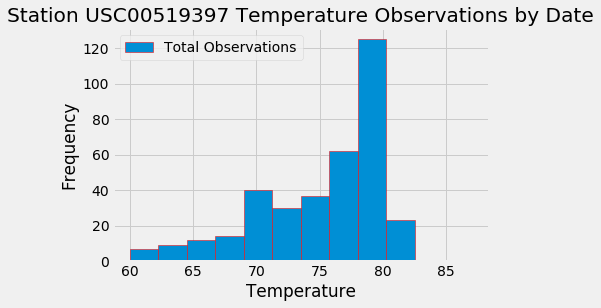

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_count= pd.read_sql("SELECT count(tobs) as count ,station FROM measurement where date between '2016-08-23'  and '2017-08-23' group by station order by count", conn)
tobs_count

hist= pd.read_sql("SELECT tobs, date FROM measurement where date between '2016-08-23' and '2017-08-23'and station = 'USC00519397'", conn)
hist_1=hist.set_index('date')
hist_1.plot(kind = 'hist', bins= 12, title ='Station USC00519397 Temperature Observations by Date', edgecolor ='red')
plt.xlabel("Temperature")
T=plt.legend()
T.get_texts()[0].set_text('Total Observations') 

## Bonus Challenge Assignment

In [86]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


NameError: name 'measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
